In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')





















In [25]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [26]:
print("Dataset Shape:", df.shape)
print("\nFeature Names:\n", data.feature_names)
print("\nTarget Names:", data.target_names)


Dataset Shape: (569, 31)

Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']


In [28]:
# Check for missing values
print("\nMissing Values per Column:\n", df.isna().sum())

# Basic statistics
df.describe().T


Missing Values per Column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/tmp/ipython-input-1571486096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


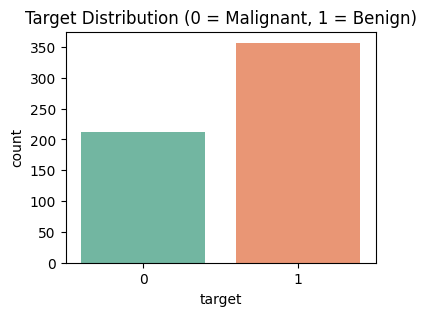

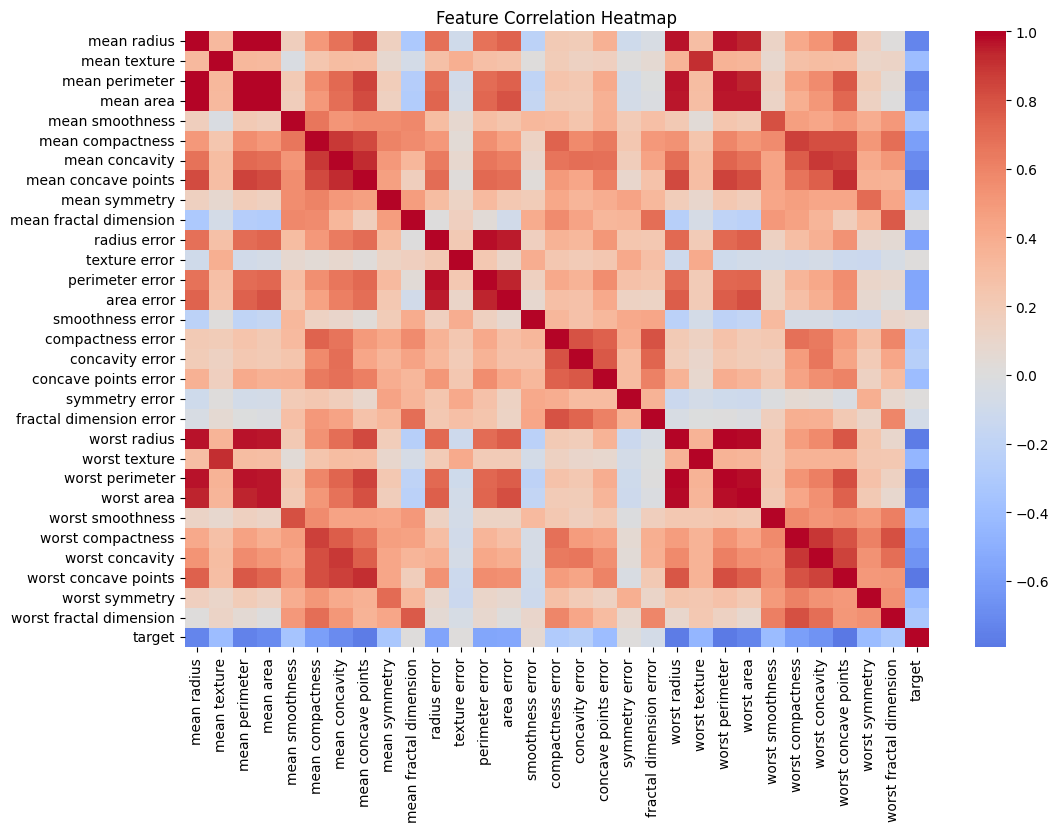

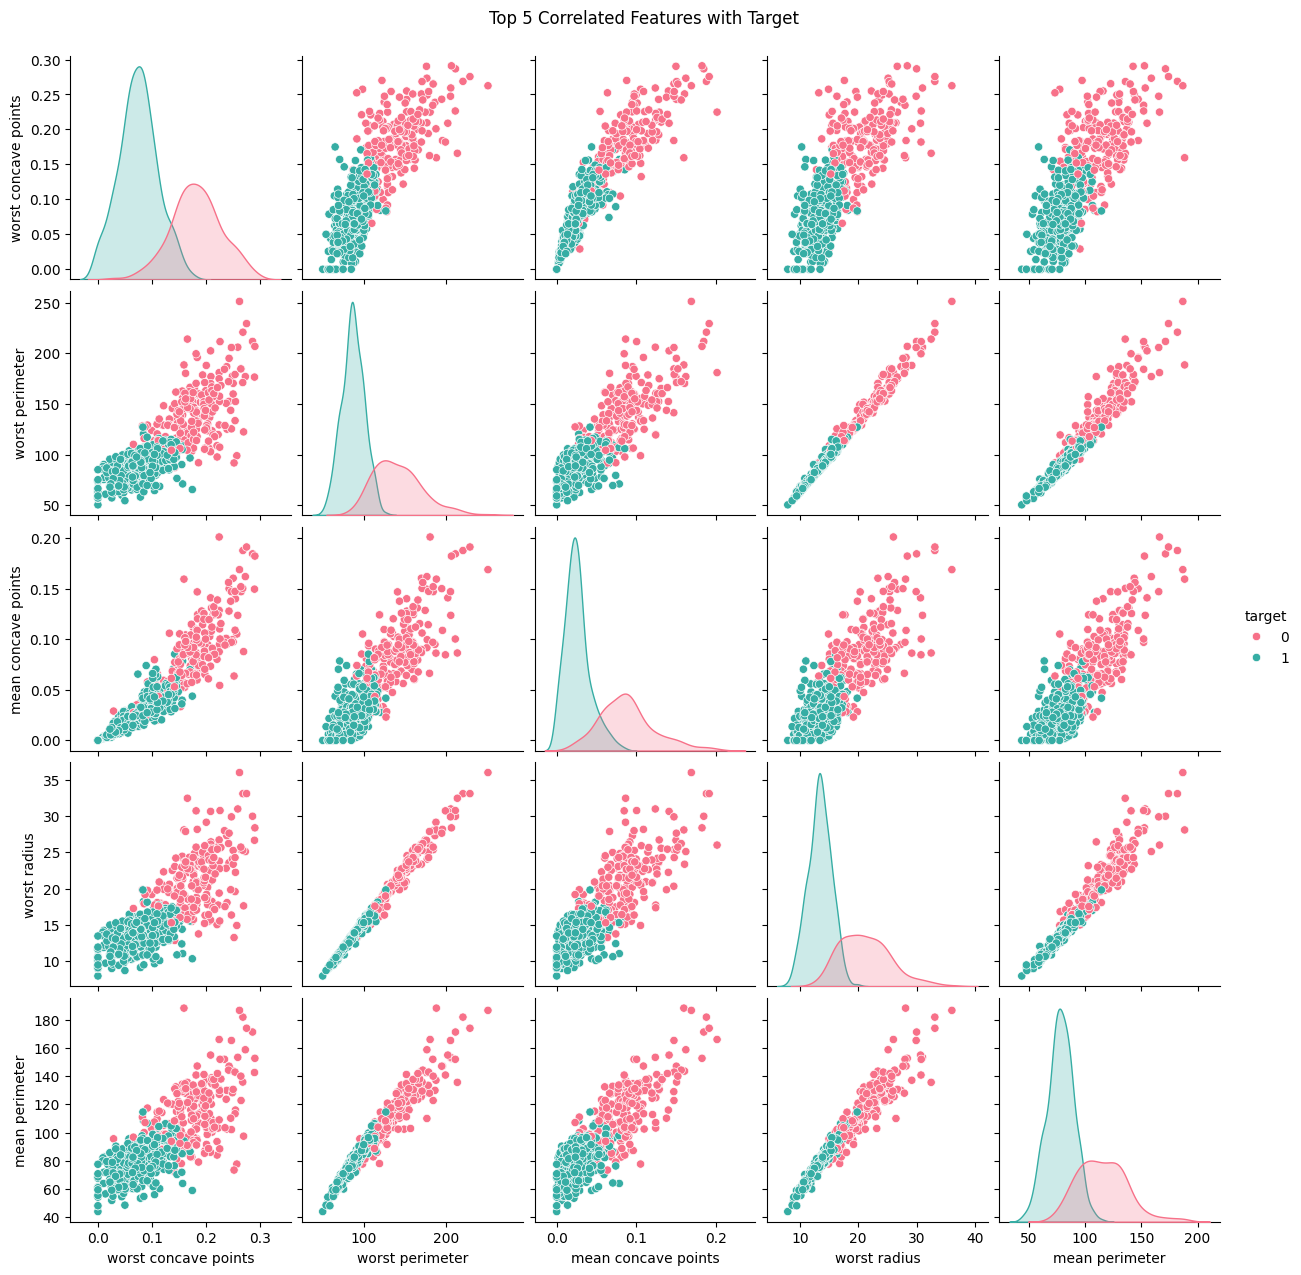

In [29]:





# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Distribution (0 = Malignant, 1 = Benign)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# Relationship of top features with target
top_corr_features = df.corr()['target'].abs().sort_values(ascending=False)[1:6].index
sns.pairplot(df, vars=top_corr_features, hue='target', palette='husl')
plt.suptitle('Top 5 Correlated Features with Target', y=1.02)
plt.show()

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [37]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob_d = model.predict_proba(X_test)

In [45]:
y_pred[67]

np.int64(1)

In [44]:
y_prob_d[67]

array([0., 1.])

In [47]:

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

In [51]:
accuracy,f1

(0.9122807017543859, 0.9285714285714286)

In [52]:

# Formulas (Google Docs Copy-Ready)
metrics_data = {
    'Metric': [
        'Accuracy',
        'Precision',
        'Recall (Sensitivity)',
        'Specificity',
        'F1-Score',
        'ROC-AUC',
        'False Positive Rate (FPR)',
        'False Negative Rate (FNR)'
    ],
    'Formula': [
        '(TP + TN) / (TP + TN + FP + FN)',
        'TP / (TP + FP)',
        'TP / (TP + FN)',
        'TN / (TN + FP)',
        '2 × (Precision × Recall) / (Precision + Recall)',
        'Area under ROC curve',
        'FP / (FP + TN)',
        'FN / (FN + TP)'
    ],
    'Value': [
        round(accuracy, 3),
        round(precision, 3),
        round(recall, 3),
        round(cm[0,0] / (cm[0,0] + cm[0,1]), 3),
        round(f1, 3),
        round(roc_auc, 3),
        round(cm[0,1] / (cm[0,1] + cm[0,0]), 3),
        round(cm[1,0] / (cm[1,0] + cm[1,1]), 3)
    ]
}

In [55]:
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Formula,Value
0,Accuracy,(TP + TN) / (TP + TN + FP + FN),0.912
1,Precision,TP / (TP + FP),0.956
2,Recall (Sensitivity),TP / (TP + FN),0.903
3,Specificity,TN / (TN + FP),0.929
4,F1-Score,2 × (Precision × Recall) / (Precision + Recall),0.929
5,ROC-AUC,Area under ROC curve,0.916
6,False Positive Rate (FPR),FP / (FP + TN),0.071
7,False Negative Rate (FNR),FN / (FN + TP),0.097


In [10]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



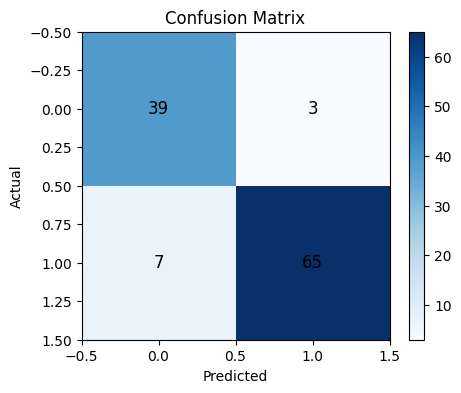

In [11]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12)
plt.show()

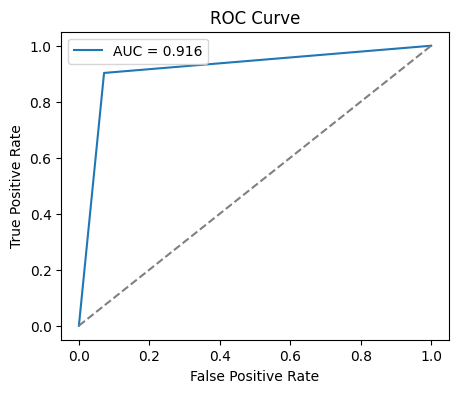

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

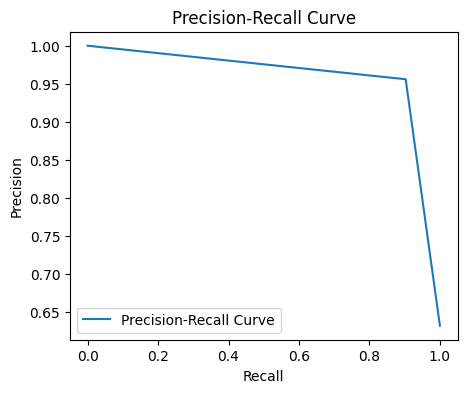

In [13]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(rec, prec, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

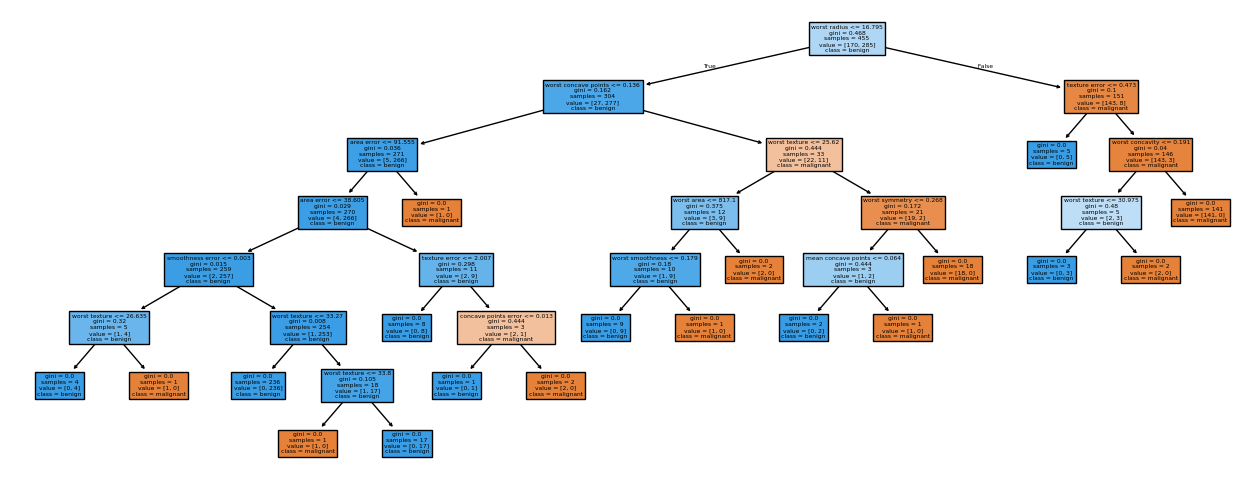

In [14]:
# Decision Tree Plot
plt.figure(figsize=(16, 6))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()
